# Dataset metadata exploration

In [90]:
import pandas as pd
import seaborn as sns
import plotly.express as px

Load metadata dataset

In [5]:
df = pd.read_csv('HAM10000_metadata.csv')

In [ ]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [ ]:
df.shape

(10015, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [ ]:
df.age.describe()

count    9958.000000
mean       51.863828
std        16.968614
min         0.000000
25%        40.000000
50%        50.000000
75%        65.000000
max        85.000000
Name: age, dtype: float64

In [6]:
# check for missing values
df.isna().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

57 missing values were found in Age feature. I will analyze the data distribution through a boxplot and a histogram.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



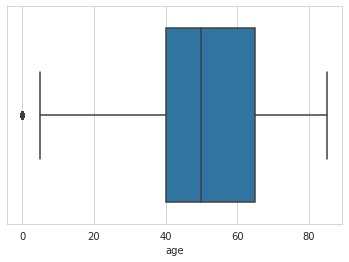

In [91]:
# Box plot
sns.boxplot(df.age)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


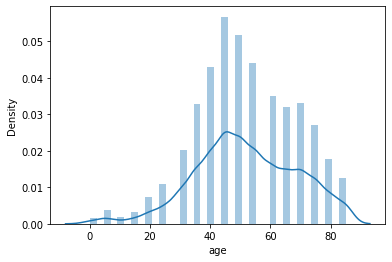

In [11]:
#Distribution plot
sns.distplot(df.age)

Since a clear symmetric data distribution is visible I will use the Mean to fill the missing Age values

In [18]:
df['age'].fillna(df['age'].mean(), inplace=True)

In [20]:
#check if the missing values still persist
df.isna().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

In [69]:
#Gender data representation
fig = px.histogram(df, x="sex", color="sex", text_auto=True)
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [70]:
#Skin cancer represented on dataset
fig = px.histogram(df, x="dx", color="dx", text_auto=True)
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [71]:
#Skin cancer localization
fig = px.histogram(df, x="localization", color="localization", text_auto=True)
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [72]:
#Skin cancer types of diagnosis
fig = px.histogram(df, x="dx_type", color="dx_type", text_auto=True)
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [77]:
# How the cancers were diagnosticated?
fig = px.histogram(df, x="dx", color="dx_type", text_auto=True, barmode='group')
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [74]:
# Which skin cancer is more prevalent on man and women?
fig = px.histogram(df, x="dx", color="sex", text_auto=True, barmode='group')
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [84]:
# Gender and age
fig = px.histogram(df, x="age", color="sex", text_auto=True)
fig.show()

In [85]:
# Age and cancer prevalence
fig = px.histogram(df, x="age", color="dx", text_auto=True)
fig.show()

In [88]:
# Age and cancer localization
fig = px.histogram(df, x="age", color="localization", text_auto=True)
fig.show()

In [75]:
# Most prevalent localization of cancer in man and women
fig = px.histogram(df, x="localization", color="sex", text_auto=True, barmode='group')
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [76]:
# Skin cancer and it's localization
fig = px.histogram(df, x="localization", color="dx", text_auto=True)
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [89]:
# Trying to capture in a easier way visual relationships between the different features presented on dataset
fig = px.sunburst(df, path=['dx', 'localization', 'age', 'sex'])
fig.show()